In [20]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [21]:
train = pd.read_csv('data/train.csv', header=None)
y = pd.read_csv('data/trainLabels.csv', header=None).values.ravel()
test = pd.read_csv('data/test.csv', header=None)

train

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332
5,-0.773247,-0.123227,0.047423,-0.210266,10.377793,0.526604,-2.751616,0.315541,0.608603,-0.043421,...,-1.487714,0.792790,-0.540711,0.114115,-0.277477,-0.896411,-2.805207,0.469162,3.614157,0.081689
6,1.483814,-0.296301,0.452697,0.053363,-4.480227,-1.189786,1.963951,-0.610189,1.312698,2.493390,...,-0.064301,-1.902989,3.441767,1.481434,-0.507055,-0.117490,1.877093,-0.531129,-1.574326,-1.733600
7,0.763901,-3.492086,0.329564,1.300720,5.037783,0.149122,-5.014214,-1.966723,-1.828132,0.289911,...,-0.314328,1.317465,-0.802101,-1.622429,3.930147,0.952521,-0.775724,1.047129,3.252374,-1.320290
8,0.380964,-1.533580,0.786602,1.311827,-6.122086,1.837293,1.872341,-2.604811,-0.179111,2.655691,...,-1.221536,-1.928555,1.500312,0.381377,-1.090007,-0.135532,0.897454,-0.157605,-0.353676,1.203563
9,-0.688936,-0.879470,-1.150302,-0.131129,-0.617483,-0.774317,-3.061153,-0.516864,-0.924853,-1.401560,...,-0.119981,0.531981,-1.326816,-0.457071,-2.998023,-0.061020,2.745646,0.861720,-1.413428,1.714611


15

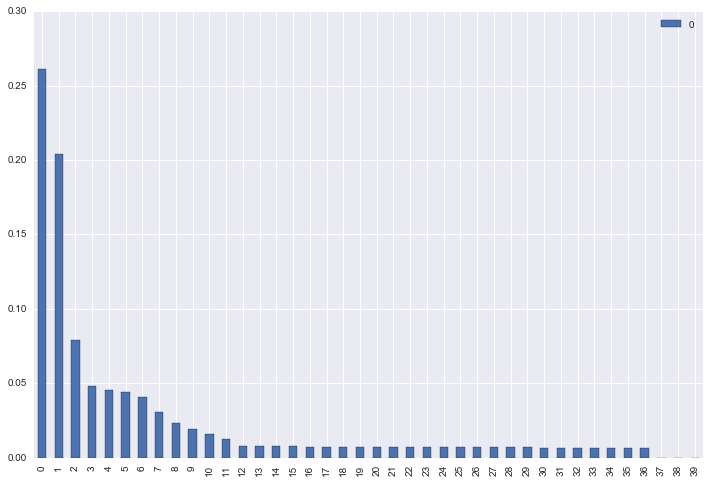

In [22]:
pca = PCA()
pca.fit(np.r_[train, test])
pd.DataFrame(pca.explained_variance_ratio_).plot(kind='bar', figsize=(12, 8))
n_components = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.85)[0][0]
n_components

In [23]:
pca = PCA(n_components=n_components)
pca.fit(np.r_[train, test])
train_pca = pca.transform(train)
test_pca = pca.transform(test)
train_pca.shape

(1000, 15)

In [24]:
svc = SVC(probability=True)
gammas = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2, 1e-1, 3e-1, 1., 3., 10.]
gs = GridSearchCV(svc, {'gamma': gammas}, scoring = 'accuracy', cv = 10, n_jobs=-1)
gs.fit(train_pca, y)
print(gs.best_params_)
print(gs.best_score_)

{'gamma': 0.03}
0.928


In [25]:
clf = SVC(probability=True, **gs.best_params_)
clf.fit(train_pca, y)
h = clf.predict(test_pca)

In [26]:
ans = pd.DataFrame({'Solution': h})
ans.index = ans.index+1

ans.to_csv('data/submit.csv', index_label='Id')